In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor

In [2]:
def cross_validation_split(data, num_sections, iteration): #split data into num_sections for cross validation
    cross_val_sections = list(range(0, num_sections))
    cross_val_sections.remove(iteration)
    test_data = data[iteration::num_sections] #iteration defines which segment will be the test set
    training_setup='pd.concat(['
    for section in cross_val_sections: #create the training set out of the rest of the data (this is much faster than .append)
        training_setup+='data[{}::{}], '.format(section, num_sections)
    training_setup=training_setup[:-2]+'])'
    training_data=eval(training_setup) #evaluate the training creation
    return training_data, test_data

In [3]:
os.chdir('Downloads') #set the file directory
cancer_data=pd.read_csv('breast-cancer-wisconsin.data', header=None) #load the data

In [4]:
cancer_data.columns=['Sample ID', 'Clump thickness', 'Cell size uniformity', 'Cell shape uniformity', 'Marginal adhesion', \
                    'Single epithelial cell size', 'Bare nuclei', 'Bland Chromatin', 'Normal nucleoli', \
                    'Mitoses', 'Class'] #set the column names

In [5]:
cancer_data.describe() #take a peak

,Sample ID,Clump thickness,Cell size uniformity,Cell shape uniformity,Marginal adhesion,Single epithelial cell size,Bland Chromatin,Normal nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
cancer_data['Class'] = [0 if x==2 else 1 for x in cancer_data['Class']] #turn target class into 1/0 instead of 2/4

In [7]:
clean_cancer_data=cancer_data[cancer_data['Bare nuclei']!='?'] #get rid of erroneous data

In [8]:
clean_cancer_data['Bare nuclei']=[int(x) for x in clean_cancer_data['Bare nuclei']] #convert to integers

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
#choose the model you'd like to use at the beginning

#model=LogisticRegression()
model=RandomForestClassifier()
#model=GradientBoostingClassifier()

cols_to_use=['Clump thickness', 'Cell size uniformity', 'Cell shape uniformity', 'Marginal adhesion', \
                    'Single epithelial cell size', 'Bare nuclei', 'Bland Chromatin', 'Normal nucleoli', \
                    'Mitoses'] #choose the columns to work with

target_column = 'Class' #choose the target column

mean_error=[]

num_sections = 10 #number of sections for cross validation

for i in list(range(0,num_sections)):
    
    training, test = cross_validation_split(clean_cancer_data, num_sections, i)

    fit=model.fit(training[cols_to_use], training[target_column]) #fit the model on the training
    prediction=fit.predict(test[cols_to_use]) #predict on the test
    
    mean_error.append(np.mean(np.abs(prediction-test[target_column]))) #compare the mean of test predicted to test actual
    
print(mean_error) #look at all the mean error
print(np.mean(mean_error)) #look at the mean of the error

#Feature weights are below, note that you will need to switch for different types of models
print('Feature Weights')
#for i in range(0, len(test[cols_to_use].keys())): print(fit.coef_[0][i], test[cols_to_use].keys()[i])
for i in range(0, len(test[cols_to_use].keys())): print(fit.feature_importances_[i], test[cols_to_use].keys()[i])

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.028985507246376812, 0.07246376811594203, 0.028985507246376812, 0.04411764705882353, 0.029411764705882353, 0.029411764705882353, 0.04411764705882353, 0.0, 0.04411764705882353, 0.08823529411764706]
0.040984654731457806
Feature Weights
0.05505046827995822 Clump thickness
0.4186692618826403 Cell size uniformity
0.1615206610489776 Cell shape uniformity
0.023381296225998573 Marginal adhesion
0.03794049631812178 Single epithelial cell size
0.18017619301903734 Bare nuclei
0.027054134147098487 Bland Chromatin
0.08855118866977837 Normal nucleoli
0.007656300408389237 Mitoses


In [10]:
#calculate the values for a confusion matrix
true_positive=np.sum([(y+z)==2 for y,z in zip(prediction, test[target_column])])
print('True Positives: {}'.format(true_positive))
true_negative=np.sum([(y+z)==0 for y,z in zip(prediction, test[target_column])])
print('True Negatives: {}'.format(true_negative))
false_positive=np.sum([(y-z)==1 for y,z in zip(prediction, test[target_column])])
print('False Positives: {}'.format(false_positive))
false_negative=np.sum([(y-z)==-1 for y,z in zip(prediction, test[target_column])])
print('False Negatives: {}'.format(false_negative))

True Positives: 18
True Negatives: 44
False Positives: 3
False Negatives: 3


In [11]:
#For cancer, we may want to be more careful, to make sure we catch all the malignant tumors. So let's try again, this time
#with a chance to control the threshold. We'll need to use regression this time

#We'll pick a regression model this time

#model=LogisticRegression()
model=RandomForestRegressor()
#model=GradientBoostingClassifier()

cols_to_use=['Clump thickness', 'Cell size uniformity', 'Cell shape uniformity', 'Marginal adhesion', \
                    'Single epithelial cell size', 'Bare nuclei', 'Bland Chromatin', 'Normal nucleoli', \
                    'Mitoses'] #choose the columns to work with

target_column = 'Class'#choose the target column

mean_error=[]

num_sections = 10 #number of sections for cross validation

for i in list(range(0,num_sections)):
    
    training, test = cross_validation_split(clean_cancer_data, num_sections, i)

    fit=model.fit(training[cols_to_use], training[target_column]) #fit the model on the training
    prediction=fit.predict(test[cols_to_use]) #predict on the test
    
    mean_error.append(np.mean(np.abs(prediction-test[target_column]))) #compare the mean of test predicted to test actual
    
print(mean_error) #look at all the mean error
print(np.mean(mean_error)) #look at the mean of the error
print('Feature Weights')
#for i in range(0, len(test[cols_to_use].keys())): print(fit.coef_[0][i], test[cols_to_use].keys()[i])
for i in range(0, len(test[cols_to_use].keys())): print(fit.feature_importances_[i], test[cols_to_use].keys()[i])

[0.04782608695652174, 0.06811594202898551, 0.04782608695652174, 0.05147058823529411, 0.05294117647058824, 0.06911764705882352, 0.07794117647058824, 0.029411764705882353, 0.04852941176470588, 0.0661764705882353]
0.05593563512361467
Feature Weights
0.061615363349481686 Clump thickness
0.32412987861246595 Cell size uniformity
0.39732807255170344 Cell shape uniformity
0.01963905099610124 Marginal adhesion
0.01751078793366665 Single epithelial cell size
0.07770996554867708 Bare nuclei
0.07940959299694685 Bland Chromatin
0.020968852442553924 Normal nucleoli
0.0016884355684032549 Mitoses


C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
#let's look at the confusion matrix values for different cutoff thresholds

true_positive=[]
false_positive=[]
true_negative=[]
false_negative=[]
for threshold in list(range(-1,102)):
    true_positive.append(np.sum([(y+z)==2 for y,z in zip([int(x>threshold/100) for x in prediction], test[target_column])]))
    true_negative.append(np.sum([(y+z)==0 for y,z in zip([int(x>threshold/100) for x in prediction], test[target_column])]))
    false_positive.append(np.sum([(y-z)==1 for y,z in zip([int(x>threshold/100) for x in prediction], test[target_column])]))
    false_negative.append(np.sum([(y-z)==-1 for y,z in zip([int(x>threshold/100) for x in prediction], test[target_column])]))

Text(0, 0.5, 'True Positive Rate')

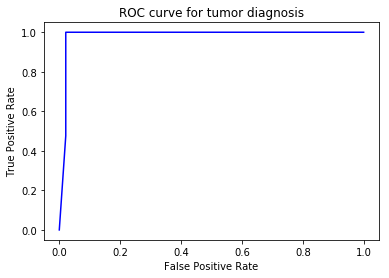

In [13]:
#and let's use those values to plot an ROC curve

plt.plot([x/(x+y) for x,y in zip(false_positive, true_negative)],[x/(x+y) for x,y in zip(true_positive, false_negative)], 'b')
plt.title('ROC curve for tumor diagnosis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')